In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stat
# import statsmodels.stats.proportion as proportion

In [2]:
def model_comp_pvals(N, frequencies):
    pNull=np.sum(frequencies)/(np.sum(N))
    pFull=frequencies/N
    LikelyNull = np.prod(stat.binom.pmf(frequencies,N,pNull))
    LikelyFull = np.prod(stat.binom.pmf(frequencies,N,pFull))

    chi_sq = -2 * np.log(LikelyNull/LikelyFull)
#     print(chi_sq)
    return chi_sq, 1-stat.chi2.cdf(chi_sq, 3, )   #% goodness of fit for Full vs Null (whehter there are differences between conditions)

#     pEffect=[.75 .75 .75 .25];  #% power to detect three dual state and one single state (87% power with N=15)


In [3]:
single_fits = pd.read_csv('model_results/single_fit_avgerror_learn_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_avgerror_learn_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)


In [4]:
pid = 661
dual_fits.loc[dual_fits['p_id'] == pid] 
# single_fits.loc[single_fits['p_id'] == pid]


,p_id,gof,As,Bs,Af,Bf,Eps
20,661,-0.813289,0.996276,0.014737,0.027891,0.097509,0.107289


In [5]:
single_fits['AIC'] = 2*single_fits['gof']*448 + 2*2
dual_fits['AIC'] = 2*dual_fits['gof']*448 + 2*4

single_fits['BIC'] = 2*single_fits['gof']*448 + np.log(64*7)*2
dual_fits['BIC'] = 2*dual_fits['gof']*448 + np.log(64*7)*4


# single_fits['AIC'] = 2*single_fits['gof'] + 2*2
# dual_fits['AIC'] = 2*dual_fits['gof'] + 2*4

# single_fits['BIC'] = 2*single_fits['gof'] + np.log(64*7)*2
# dual_fits['BIC'] = 2*dual_fits['gof'] + np.log(64*7)*4

In [6]:
single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [148]:
dual_fits

,p_id,gof,As,Bs,Af,Bf,Eps,AIC,BIC,Rotation,Emphasis
0,641,-0.536986,0.998321,0.014620,0.898813,0.055831,0.141434,-473.139732,-456.720559,Gradual,Accuracy
1,642,-0.234639,1.000000,0.000808,0.024233,0.406407,0.191366,-202.236474,-185.817301,Sudden,Speed
2,643,0.507552,1.000000,0.003201,0.000000,0.003201,0.401958,462.766932,479.186105,Gradual,Speed
3,644,-0.398891,0.996522,0.007859,0.308617,0.412885,0.162378,-349.406525,-332.987352,Sudden,Accuracy
4,645,-0.649462,0.996766,0.011500,0.000000,0.145164,0.126388,-573.917562,-557.498389,Gradual,Accuracy
...,...,...,...,...,...,...,...,...,...,...,...
57,698,-0.033572,1.000000,0.003938,0.224445,0.324261,0.233982,-22.080787,-5.661614,Sudden,Speed
58,699,-0.133380,1.000000,0.000237,0.987658,0.018938,0.211723,-111.508475,-95.089302,Gradual,Speed
59,700,-0.708889,0.998270,0.008774,0.182922,0.448027,0.119095,-627.164491,-610.745318,Sudden,Accuracy
60,701,-0.294832,0.999816,0.009297,0.000000,0.010809,0.180186,-256.169607,-239.750434,Gradual,Accuracy


In [151]:
single_fits[single_fits['p_id'] == 653]

,p_id,gof,A,B,Eps,AIC,BIC,Rotation,Emphasis,Condition
12,653,-0.111602,0.991979,0.022982,0.216416,-95.994973,-87.785386,Gradual,Accuracy,Gradual Accuracy


In [150]:
dual_fits[dual_fits['p_id'] == 651]

,p_id,gof,As,Bs,Af,Bf,Eps,AIC,BIC,Rotation,Emphasis
10,651,0.428472,1.0,0.001366,0.0,0.001386,0.371399,391.91126,408.330433,Gradual,Speed


In [130]:
sum(dual_fits['Bs'] > dual_fits['Bf'])

2

In [127]:
single_fits['Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [128]:
single_fits.loc[single_fits['AIC'] > dual_fits['AIC'], 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [102]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([8, 16, 10, 14]))

(17.61172583860489, 0.0005288597222199432)

In [131]:
single_fits.loc[single_fits['BIC'] > dual_fits['BIC'], 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Sudden Accuracy     15
Gradual Speed       14
Name: Condition, dtype: int64

In [104]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([16, 7, 10, 12]))

(16.798233580514545, 0.0007775787274861834)

In [105]:
single_fits.loc[(single_fits['gof'].values < dual_fits['gof'].values), 'Condition'].value_counts()


Series([], Name: Condition, dtype: int64)

(array([11., 14.,  7.,  8.,  8.,  6.,  3.,  4.,  0.,  1.]),
 array([0.01060221, 0.04810569, 0.08560916, 0.12311264, 0.16061612,
        0.1981196 , 0.23562308, 0.27312655, 0.31063003, 0.34813351,
        0.38563699]),
 <BarContainer object of 10 artists>)

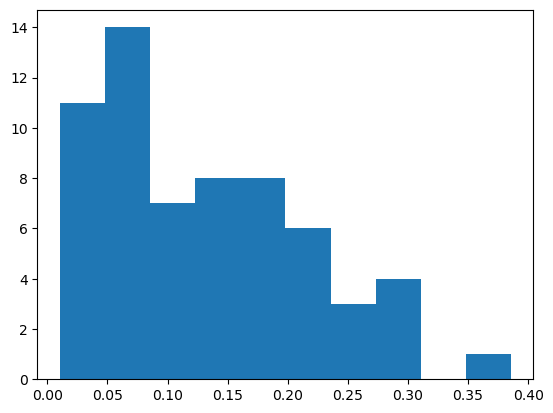

In [132]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

In [133]:
# single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*640
single_fits['LR_ratio'] = 2* (single_fits['gof'].values - dual_fits['gof'].values)*448

In [134]:
single_fits['chi2'] = stat.chi2.sf(single_fits['LR_ratio'], 2)

In [135]:
single_fits.loc[single_fits['chi2'] < 0.05, 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        16
Gradual Speed       15
Sudden Accuracy     15
Name: Condition, dtype: int64

In [136]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([16, 14, 12, 2]))

(35.85364079334426, 8.041371701850153e-08)

# Cross Validation Comparisons

In [137]:
single_fits = pd.read_csv('model_results/single_fit_avgerror_learn_results_cv.csv')
dual_fits = pd.read_csv('model_results/dual_fit_avgerror_learn_results_cv.csv')

single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [138]:
dual_fits['dual win'] = (single_fits['test gof'].values >= dual_fits['test gof'].values).astype(int)

In [139]:
def compute_wins(dual_fits):
    # Drop column: 'Unnamed: 0'
    # dual_fits = dual_fits.drop(columns=['Unnamed: 0'])
    # Performed 1 aggregation grouped on columns: 'p_id', 'Rotation' and 2 other columns
    dual_fits = dual_fits.groupby(['p_id', 'Rotation', 'Emphasis', 'dual win']).agg(dualwin_count=('dual win', 'count')).reset_index()
    # Filter rows based on column: 'dual win'
    dual_fits = dual_fits[dual_fits['dual win'] == 1]
    return dual_fits

dual_fits_wins = compute_wins(dual_fits.copy())
dual_fits_wins['Condition'] = dual_fits_wins['Rotation'] + ' ' + dual_fits_wins['Emphasis']

In [141]:
dual_fits_wins.loc[dual_fits_wins['dualwin_count'] > 58, 'Condition'].value_counts()

Gradual Accuracy    16
Sudden Speed        15
Sudden Accuracy     15
Gradual Speed       12
Name: Condition, dtype: int64

In [95]:
model_comp_pvals(np.array([16, 16, 15, 15]), np.array([15, 16, 15, 12]))

(7.169513848495249, 0.06668662927877589)

(array([ 205., 2620., 1758., 1061.,  370.,   84.,   52.,   31.,   16.,
           3.]),
 array([-0.05622616, -0.01540979,  0.02540658,  0.06622296,  0.10703933,
         0.1478557 ,  0.18867208,  0.22948845,  0.27030482,  0.3111212 ,
         0.35193757]),
 <BarContainer object of 10 artists>)

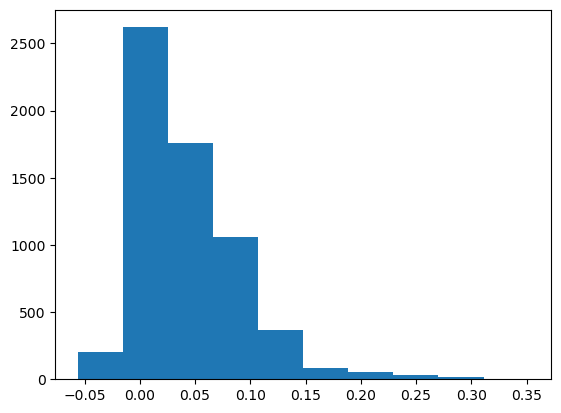

In [26]:
plt.hist(single_fits['gof'].values - dual_fits['gof'].values)

2/15

# Assessing Model fits visually

In [8]:
# from model_fit_functions import *
df = pd.read_csv('df_allphases.csv')
df = df.loc[df['block'] >= 1].reset_index().drop('index', axis = 1)
df

,target_x,target_y,p_id,avg errors,trial,block,Rotation,Emphasis,init errors,phase,init signed errors,init errors degrees,init signed errors degrees,avg errors degrees,avg signed errors,avg signed errors degrees,avg smooth errors
0,-0.3,-0.3,641,0.276929,64.0,1.0,Gradual,Accuracy,0.188780,Learning,0.188780,10.816272,10.816272,15.866842,0.276929,15.866842,0.260748
1,-0.3,-0.3,641,0.276929,65.0,1.0,Gradual,Accuracy,0.188780,Learning,0.188780,10.816272,10.816272,15.866842,0.276929,15.866842,0.263516
2,0.3,0.3,641,0.146259,66.0,1.0,Gradual,Accuracy,0.140401,Learning,0.140401,8.044366,8.044366,8.380007,0.146259,8.380007,0.268064
3,0.3,-0.3,641,0.272961,67.0,1.0,Gradual,Accuracy,0.291686,Learning,0.291686,16.712401,16.712401,15.639499,0.272961,15.639499,0.267902
4,-0.3,-0.3,641,0.588735,68.0,1.0,Gradual,Accuracy,0.238112,Learning,0.238112,13.642797,13.642797,33.732025,0.588735,33.732025,0.253358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39675,0.3,-0.3,702,0.402465,699.0,10.0,Sudden,Speed,1.203681,Relearning,-1.203681,68.965836,-68.965836,23.059538,-0.402465,-23.059538,0.683453
39676,0.3,0.3,702,0.827459,700.0,10.0,Sudden,Speed,0.704598,Relearning,0.704598,40.370510,40.370510,47.409898,0.827459,47.409898,0.693965
39677,0.3,0.3,702,0.827459,701.0,10.0,Sudden,Speed,0.704598,Relearning,0.704598,40.370510,40.370510,47.409898,0.827459,47.409898,0.706188
39678,-0.3,-0.3,702,0.715479,702.0,10.0,Sudden,Speed,1.933589,Relearning,1.933589,110.786514,110.786514,40.993934,0.715479,40.993934,0.710903


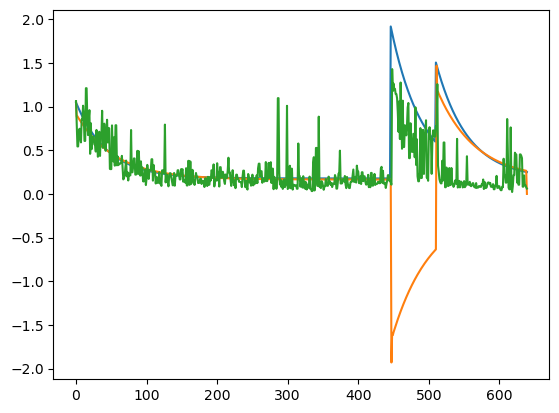

In [9]:
from model_fit_functions import *
pid = 668
ptype = df.loc[df['p_id'] == pid, 'Rotation'].unique()

A = single_fits.loc[single_fits['p_id'] == pid, 'A'].values[0]
B = single_fits.loc[single_fits['p_id'] == pid, 'B'].values[0]
As = dual_fits.loc[dual_fits['p_id'] == pid, 'As'].values[0]
Bs = dual_fits.loc[dual_fits['p_id'] == pid, 'Bs'].values[0]
Af = dual_fits.loc[dual_fits['p_id'] == pid, 'Af'].values[0]
Bf = dual_fits.loc[dual_fits['p_id'] == pid, 'Bf'].values[0]
data = df.loc[df['p_id'] == pid, 'avg errors'].values


plt.plot(single_state_model(A, B, len(data), ptype))
plt.plot(dual_state_model(As, Bs, Af, Bf, len(data), ptype))
plt.plot(data)

In [51]:
single_fits[single_fits.p_id == pid], dual_fits[dual_fits.p_id == pid]

(    p_id       gof    A         B       Eps
 26   667  0.657167  1.0  0.001491  0.466815,
     p_id       gof   As       Bs   Af        Bf       Eps
 26   667  0.646565  1.0  0.00157  0.0  0.001591  0.461917)

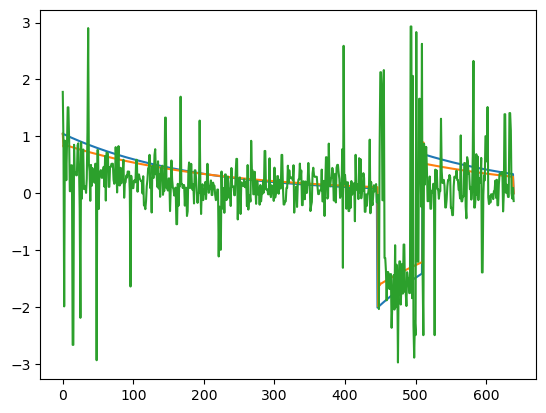

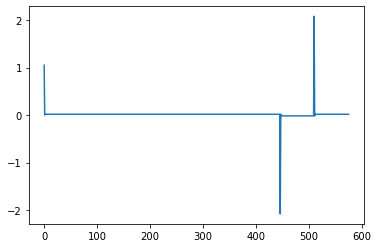

In [262]:
plt.plot(single_state_model(A, B, len(data), 'Sudden'))
